# Sparse Hebbian Learning: toward a quantitative measure of the quality of filters

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
do_random = True # draw new coeff at random
do_random = False # draw new coeff with bootstrap resampling?

do_double_shuffle = True # shuffle accross dictionary elements
do_double_shuffle = False # only shuffles 

l0_sparseness_noise = 200 #shl.n_dictionary #

In [4]:
tag = 'coding'
homeo_methods = ['None', 'HAP', 'HEH']


record_num_batches = 2**12

seed = 42
np.random.seed(seed)

from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag)
indx = np.random.permutation(data.shape[0])[:record_num_batches]

list_figures = []

dico = {}
for homeo_method in homeo_methods:
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)


🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

In [5]:
from shl_scripts.shl_encode import sparse_encode
stick = np.arange(shl.n_dictionary)*shl.nb_quant
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))

for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    for P_cum_rec, gain_rec in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None]):
        sparse_code = sparse_encode(data[indx, :], dico[homeo_method].dictionary, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

        # from shl_scripts.shl_tools import print_stats
        # SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)

## Generating new coefficients by shuffling and decoding

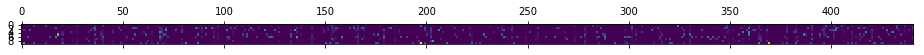

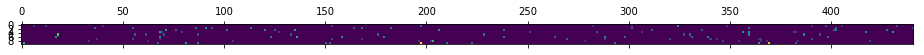

average non-zeros [ 192  223 1196  321  195  412  387  128  576  214  233  307  243  231
  204  136 1408  304  308  158 2975  151  574  201  299 1542  161 2911
  534  156  487  227  321 1633  485  174 3312  341  379 2241 3411  432
  324  184  222 2791  620  357 1089  496  208 1109 1012  199  280  240
  214  273  211  441  871  518 2776  254 1415  290  344  497 2999 2968
  136  901  233  210  328  183  181 1152  270 2748  364  238  161  851
  181  172  641 3021  258 1403  214  399  268  286  309 3123  223 2650
 1149  231  493 1293  329  237 1711  219  627  223  215 2327  406  232
 2440  403  306  523  491 1026  211  628]
average non-zeros [ 94  93 133  69  87  85  80  89  42  94  92 116 107  82 106  56  97 142
 127  71 277  45  99  71 140 121  62 239 102  81  99  93 119 121 111  76
 385  78  39 148 401 106  93  97 115 227  94  84 163 143  93  65 102  82
  91  76  78  99 108 172 148 129 214  58  60  97  84 119 365 313  60 173
  94 107 130 108 108 148  87 212 113  99  47 146  81  84 116 3

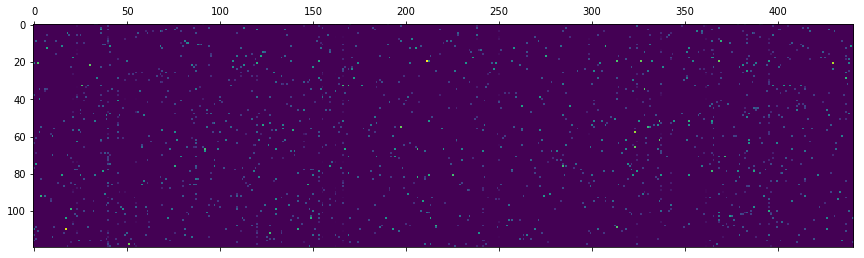

<Figure size 1080x216 with 0 Axes>

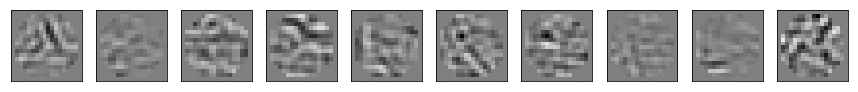

<Figure size 1080x216 with 0 Axes>

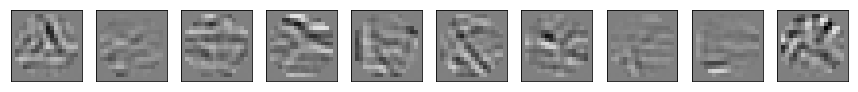

<Figure size 1080x216 with 0 Axes>

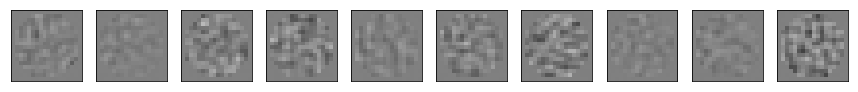

mean deviation of coefficients =  0.05061274593738919 0.02248236072948597 0.021915656408489567
total deviation of coefficients =  0.018125538333352155
mean deviation of quantiles =  0.0031479777169632927
mean deviation of quantiles =  0.0031152836967140943
total deviation of quantiles =  0.0027348472306445697
ratio deviation of quantiles =  0.8687632113491417
proba incorrect coefficients =  0.16214369862528344
proba incorrect coefficients (strong) =  0.02571503861961455


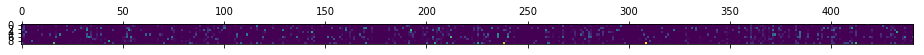

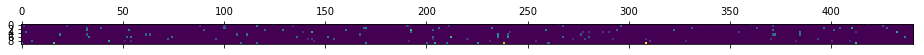

average non-zeros [2505 3485  248  727  179 2337  227  283 1089  151 2280  155  312  198
  289   97 1252 1363  273  431  174  336  299  234  230  347  162  580
  381 2086 1643  459  424  395 2451  282  368 2249  101 2028  566  306
  259  254  328  315   70  270  294  338 1656 1606 1052  470 3519 1461
 1606  202  303  309  262  378  243  278  341  223   72 1558  216 1667
  392  216  427  155  755 1819  369  158  310 1918  166  389  581  470
  436   98 1568  426 2691  340  536 1825 2682  187  834 1903  119 2175
  399  373  422  168 1639 1498  183  589  256  321 2610 1086  176  267
  229  268  262  321 1842  262  529 1101]
average non-zeros [249 439 117 100  66 168 111  96  40  95 214  80 122  75  77  43  59 127
  81 103  92 106  91  97  93 131  56 122 159 193 104  86 133 121 139 103
  72 171  46 205 128  64  87  80  86 108  55 100 119 139 103 138  89 133
 513  98 179  91 101  98  90 111 115 122  39  84  19  89  96  91 133  70
 104  88 140 144  83  57 100 182  60  84 104 100 139  61 162 1

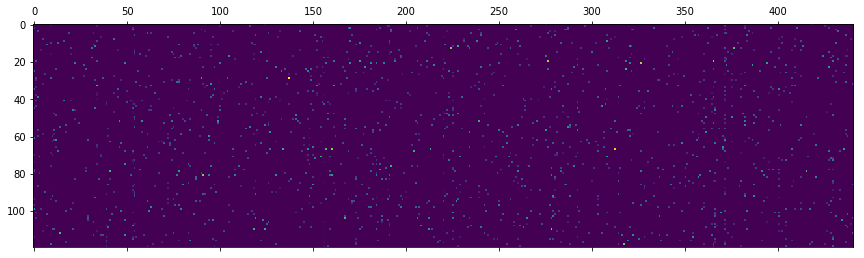

<Figure size 1080x216 with 0 Axes>

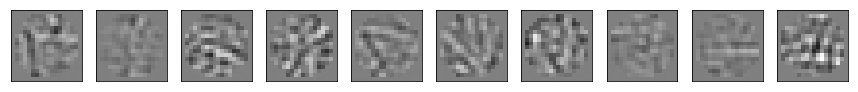

<Figure size 1080x216 with 0 Axes>

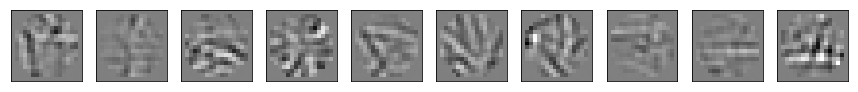

<Figure size 1080x216 with 0 Axes>

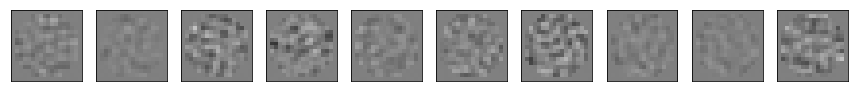

mean deviation of coefficients =  0.05226780144224579 0.022500560198198963 0.02198925900261823
total deviation of coefficients =  0.0176653230163411
mean deviation of quantiles =  0.003147926235706685
mean deviation of quantiles =  0.0031350441617657523
total deviation of quantiles =  0.0026569992347252906
ratio deviation of quantiles =  0.8440474889745359
proba incorrect coefficients =  0.17906358506944442
proba incorrect coefficients (strong) =  0.02476671006944442


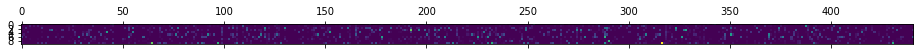

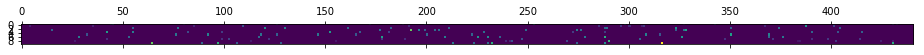

average non-zeros [2215 1685  882  985 1684  246  633  246  757  311 1523  231 1133  972
  564  613  473  779  857  392  996  222  484 1331 1342 2066 1886  719
  553  252 1172 1272  698  837 1471  640 1118  401  714  242  575 2123
  384  420  499 2087  396  526  424  256 1823 1540  321 2726 1601  539
  796  463  418  387  858  694 1727 2449  260  421  924  396 2245 1174
  901 1221  246 1528 1425  631  358  587 1143  296  490 2412  685  368
  857 1659 2423  321  303 1690  356 1279  772 1363  579  650  663  877
  500 2821  412  432 1753  323 2064  668 1933  662  241 1517 1105 1038
 2181 1612 1033 1790  646  418 1684  266]
average non-zeros [133 102 100 127 102  93  85  82 144  88 137  70 120 147 113 101  70  68
 108  92 106  62 147  99 140 184 171 134 129  71 149  89 139 118 112  77
 158  89 120  75 116  93  94 110 103 197  75 126  99  61 107 143  61 157
  98 119 115 108  93  96 112  81  70 223  79  82  79 103 167 130 127 154
  72  95 121 132 115 138  76  90 108 151 143  90 119 143 153 1

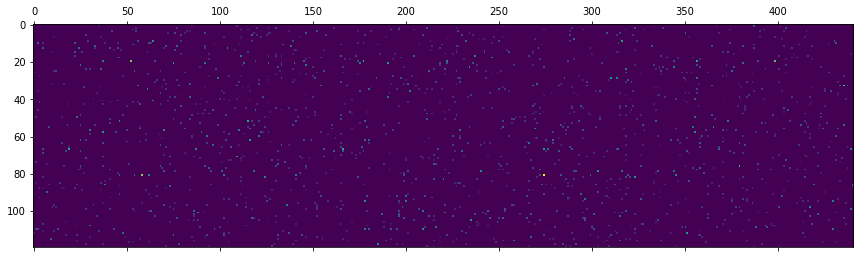

<Figure size 1080x216 with 0 Axes>

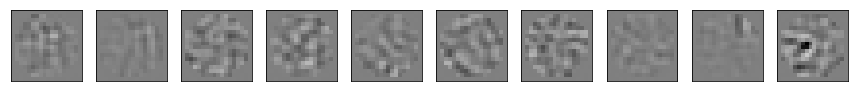

<Figure size 1080x216 with 0 Axes>

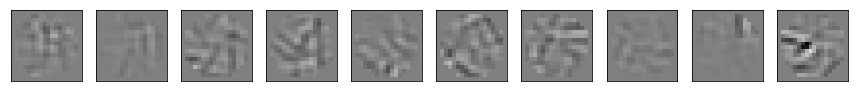

<Figure size 1080x216 with 0 Axes>

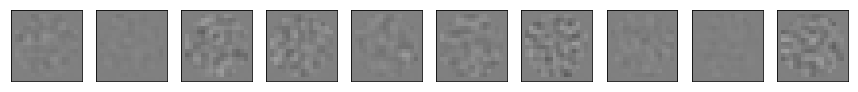

mean deviation of coefficients =  0.05764785316837081 0.02258643225215309 0.02227724570833894
total deviation of coefficients =  0.01839446961172342
mean deviation of quantiles =  0.0031471236993383827
mean deviation of quantiles =  0.003142971170982816
total deviation of quantiles =  0.00274614770113889
ratio deviation of quantiles =  0.8725896925234335
proba incorrect coefficients =  0.2399415169713719
proba incorrect coefficients (strong) =  0.025497471123866244


In [6]:
def shuffling(data, sparse_code, dico, N_show=10):
    if do_random:
        from shl_scripts.shl_encode import inv_quantile, inv_rescaling
        sparse_code_bar = inv_rescaling(inv_quantile(dico.P_cum, np.random.rand(sparse_code.shape[0], sparse_code.shape[1])), C=shl.C)
    else:
        sparse_code = sparse_encode(data, dico.dictionary, P_cum=dico.P_cum, C=shl.C, 
                                     l0_sparseness=l0_sparseness_noise, gain=None)   

        sparse_code_bar = sparse_code.copy()
        
        sparse_code_bar = sparse_code_bar.T
        np.random.shuffle(sparse_code_bar)
        sparse_code_bar = sparse_code_bar.T
        
        if do_double_shuffle:
            np.random.shuffle(sparse_code_bar)

    plt.matshow(sparse_code_bar[:N_show, :])
    plt.show()

    def threshold(sparse_code, l0_sparseness):
        thr = np.percentile(sparse_code, 100 * (1 - l0_sparseness/shl.n_dictionary ), axis=1)
        return (sparse_code>thr[:, np.newaxis])

    sparse_code_bar_high = threshold(sparse_code_bar, shl.l0_sparseness) * sparse_code_bar
    plt.matshow(sparse_code_bar_high[:N_show, :])
    plt.show()
    return sparse_code_bar, sparse_code_bar_high

def pipeline(sparse_code_bar, sparse_code_bar_high, dico, index, N_show=120):

    patches_bar = sparse_code_bar @ dico.dictionary
    SD = np.sqrt(np.mean(patches_bar**2, axis=1))


    P_cum_rec = dico.P_cum
    gain_rec = None

    sparse_code_rec = sparse_encode(patches_bar, dico.dictionary, P_cum=P_cum_rec, C=shl.C, 
                                     l0_sparseness=shl.l0_sparseness, gain=gain_rec)   

    print('average non-zeros', np.count_nonzero(sparse_code_bar, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_bar_high, axis=0)[:N_show])
    print('average non-zeros', np.count_nonzero(sparse_code_rec, axis=0)[:N_show])
    
    from shl_scripts.shl_tools import print_stats
    SD, SE = print_stats(patches_bar, dico.dictionary, sparse_code_rec, verbose=False, display=True)
    #plt.matshow(sparse_code_rec[:N_show, :])
    plt.show()

    print('mean deviation of coefficients = ', np.mean(np.abs(sparse_code_bar)), np.mean(np.abs(sparse_code_bar_high)), np.mean(np.abs(sparse_code_rec)))
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code_bar_high-sparse_code_rec)))

    from shl_scripts.shl_encode import quantile, rescaling

    q_rec = quantile(dico.P_cum, rescaling(sparse_code_rec, C=shl.C), stick, do_fast=False)
    q_bar = quantile(dico.P_cum, rescaling(sparse_code_bar_high, C=shl.C), stick, do_fast=False)

    print('mean deviation of quantiles = ', np.mean(np.abs(q_bar)))
    print('mean deviation of quantiles = ', np.mean(np.abs(q_rec)))
    print('total deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec)))
    print('ratio deviation of quantiles = ', np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar)))
    aerror = np.mean(np.abs(q_bar-q_rec))/np.mean(np.abs(q_bar))

    perror = 1 - np.mean( (sparse_code_bar>0) == (sparse_code_rec>0))
    print('proba incorrect coefficients = ', perror)

    perror_high = 1 - np.mean( (sparse_code_bar_high > 0) == (sparse_code_rec>0))
    print('proba incorrect coefficients (strong) = ', perror_high)
    
    return pd.DataFrame({'error':[(SD/SE).mean()],
                               'aerror':[aerror],
                               'perror':[perror],
                               'perror_high':[perror_high]
                                        },
                                index=[index])

record = None
for homeo_method in homeo_methods:
    shl = SHL(homeo_method=homeo_method)

    sparse_code_bar, sparse_code_bar_high = shuffling(data[indx, :], sparse_code, dico[homeo_method])
    record_ = pipeline(sparse_code_bar, sparse_code_bar_high, dico[homeo_method], index=homeo_method)
    if record is None:
        record = record_
    else:
        record = pd.concat((record, record_))


In [7]:
record

,error,aerror,perror,perror_high
None,2.243386,0.868763,0.162144,0.025715
HAP,2.262724,0.844047,0.179064,0.024767
HEH,2.370083,0.872590,0.239942,0.025497


In [8]:
record_

,error,aerror,perror,perror_high
HEH,2.370083,0.87259,0.239942,0.025497


## Version used

In [9]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
Fri Sep 07 15:30:24 2018 CEST